# Lab | Text Generation from Shakespeare's Sonnet

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 
import requests

In [31]:
tokenizer = Tokenizer()

url = "https://www.gutenberg.org/files/1041/1041-0.txt"
r = requests.get(url)
if r.status_code != 200:
    raise ValueError(f"Error {r.status_code}")

with open("/tmp/sonnets.txt", "w", encoding="utf-8") as f:
    f.write(r.text)

data = r.text.strip()
print("File was downloaded, length:", len(data))

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

File was downloaded, length: 98937


In [32]:
corpus

['*** start of the project gutenberg ebook 1041 ***\r',
 'the sonnets\r',
 '\r',
 'by william shakespeare\r',
 '\r',
 '\r',
 '\r',
 '\r',
 'i\r',
 '\r',
 'from fairest creatures we desire increase,\r',
 'that thereby beauty’s rose might never die,\r',
 'but as the riper should by time decease,\r',
 'his tender heir might bear his memory:\r',
 'but thou, contracted to thine own bright eyes,\r',
 'feed’st thy light’s flame with self-substantial fuel,\r',
 'making a famine where abundance lies,\r',
 'thyself thy foe, to thy sweet self too cruel:\r',
 'thou that art now the world’s fresh ornament,\r',
 'and only herald to the gaudy spring,\r',
 'within thine own bud buriest thy content,\r',
 'and tender churl mak’st waste in niggarding:\r',
 '    pity the world, or else this glutton be,\r',
 '    to eat the world’s due, by the grave and thee.\r',
 '\r',
 'ii\r',
 '\r',
 'when forty winters shall besiege thy brow,\r',
 'and dig deep trenches in thy beauty’s field,\r',
 'thy youth’s proud li

In [33]:
max_features = total_words
max_length = max_sequence_len - 1


model = Sequential()
model.add(Embedding(max_features, 32, input_length=max_length))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(max_features, activation='softmax'))
# Pick an optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())


/Users/sergej/Library/Mobile Documents/com~apple~CloudDocs/DS_AI/python_projects/tf_env/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.1095 - loss: 6.5797
Epoch 2/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.1208 - loss: 6.0613
Epoch 3/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.1246 - loss: 5.9086
Epoch 4/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.1317 - loss: 5.7750
Epoch 5/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.1379 - loss: 5.6606
Epoch 6/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.1392 - loss: 5.5750
Epoch 7/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.1428 - loss: 5.5213
Epoch 8/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.1460 - loss: 5.4995
Epoch 9/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.1468 - loss: 5.4103
Epoch 10/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.1506 - loss: 5.2980
Epoch 11/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.1495 - loss: 5.2007
Epoch 12/100
542/54

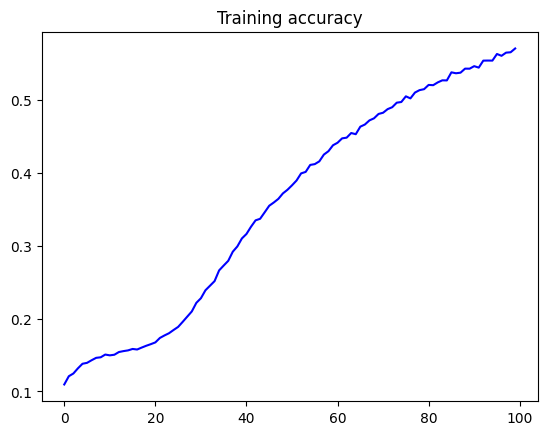

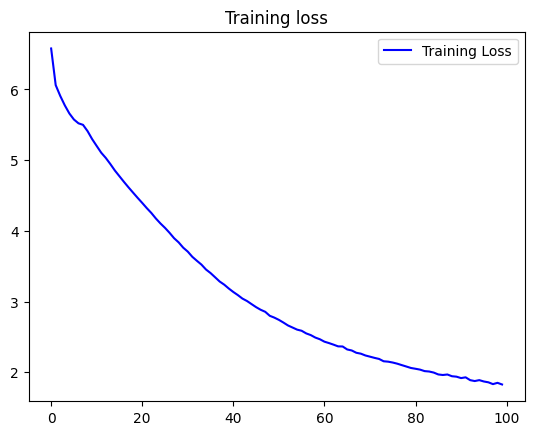

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [36]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	predicted_index = np.argmax(predicted, axis=1)[0]
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted_index:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

 hatred pierced perusalteel sleep whate’er r buried loves lend here speak deserv’d pent toil brave tamp gaze blessed sleep table toil nothing pleasure and out 
